In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

In [103]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [4]:
data = pd.read_csv('Ecommerce Customers')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [7]:
data.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


### Explorator Data Analysis

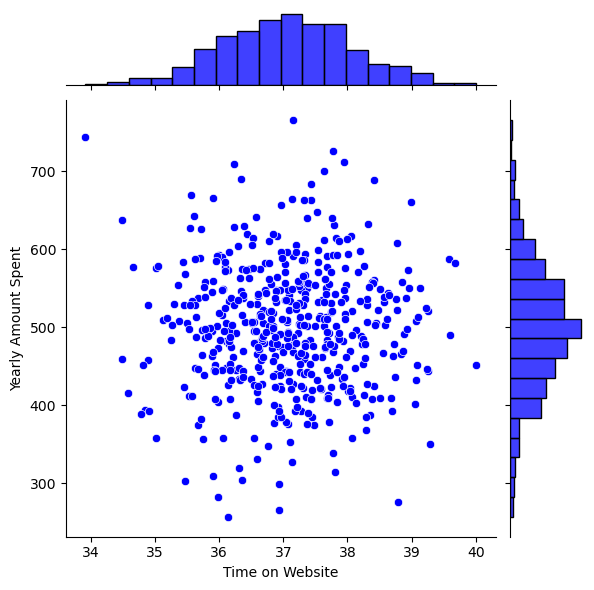

In [22]:

sns.jointplot(x = data['Time on Website'], y = 'Yearly Amount Spent', data = data, color = 'blue')


In [30]:
cr= data['Time on Website'].corr(data['Yearly Amount Spent'])

In [32]:
cr

-0.0026408446721588943

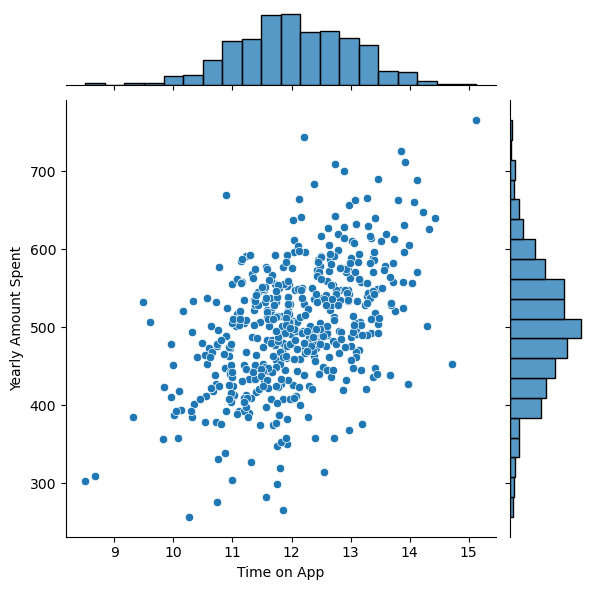

In [37]:
sns.jointplot(x =data.columns[4], y= data.columns[7], data = data)

In [40]:
cr1 = data['Time on App'].corr(data['Yearly Amount Spent'])

In [43]:
cr1


#correlation between Time on App and Yearly Amount Spent 
# 0.49932777005345036 is the correlation between them , which mean that as one variable increases,the other variable tends to 
#increase as well, but not necessarily in a perfect or strong linear fashion.  

0.49932777005345036

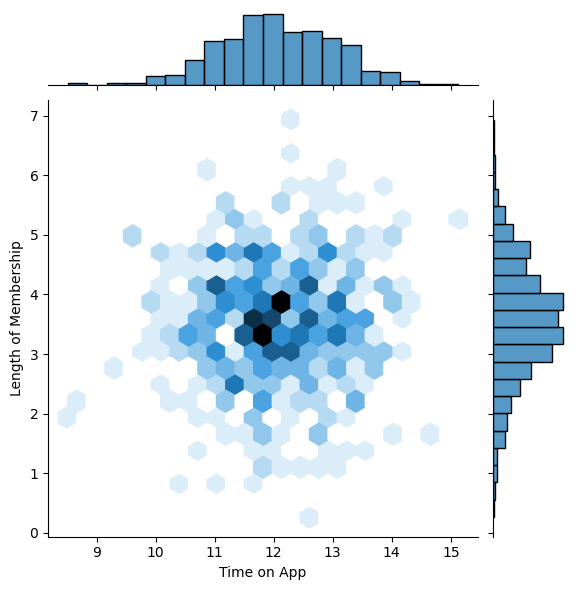

In [46]:
#comparing time on app and length of membership 

sns.jointplot(x = data['Time on App'], y = data['Length of Membership'] , kind = 'hex')

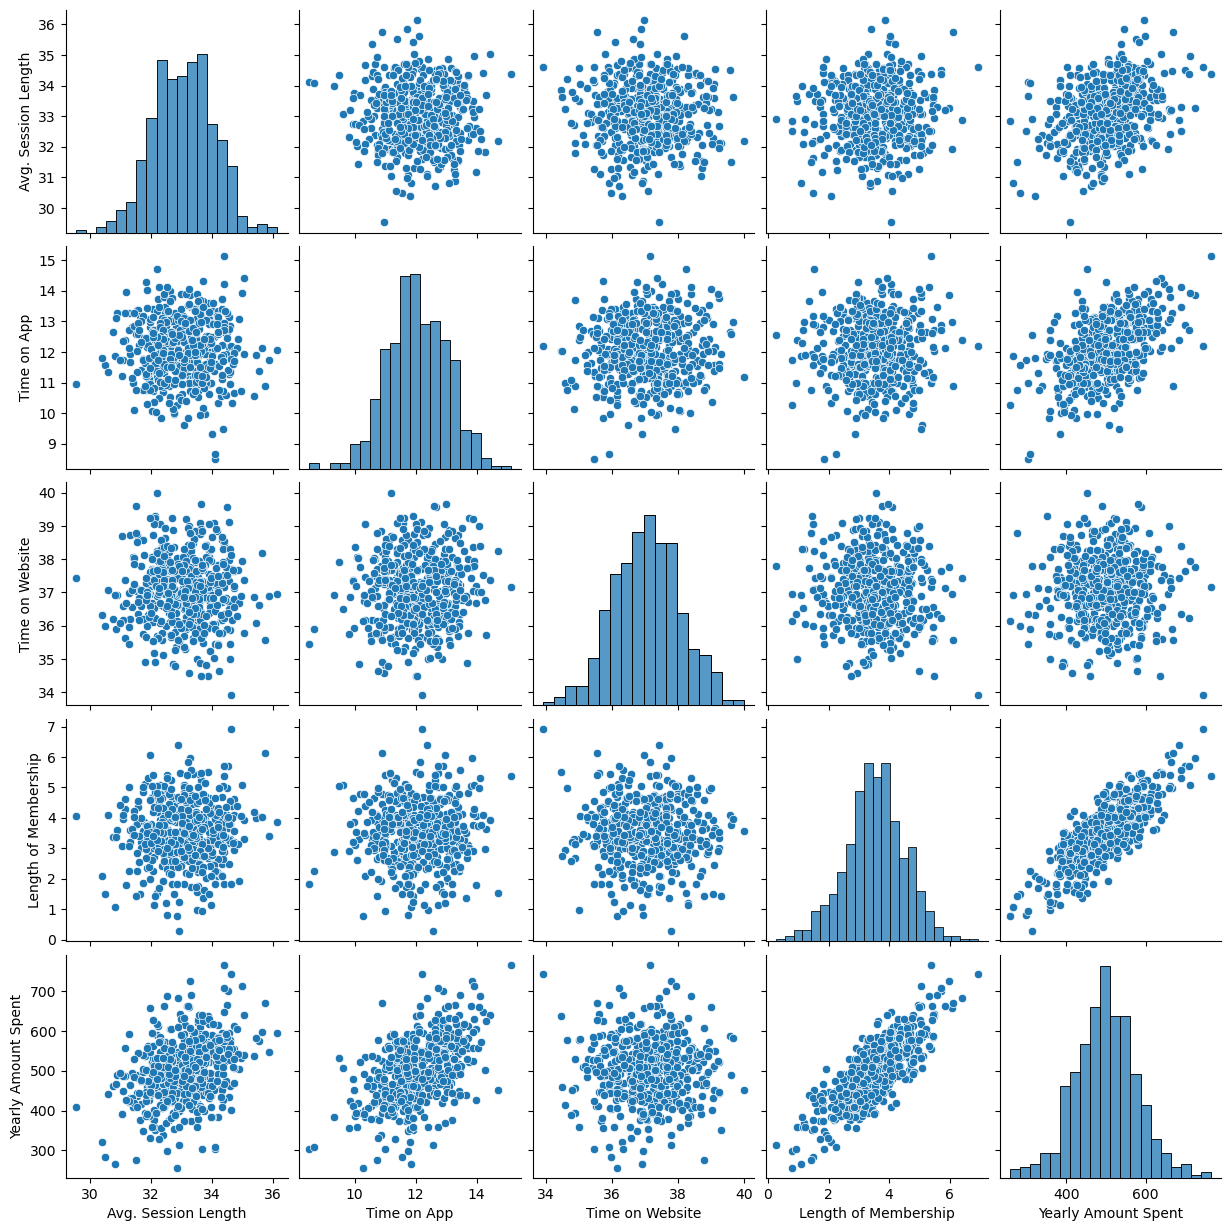

In [47]:
# creating a pairplot to analize the whole set of data
sns.pairplot(data)

##### - Based off this plot Length of membership looks to be the most correlated feature with Yearly Amount Spent

**Create a linear model plot (using seaborn's lmplot) of  Yearly Amount Spent vs. Length of Membership. **

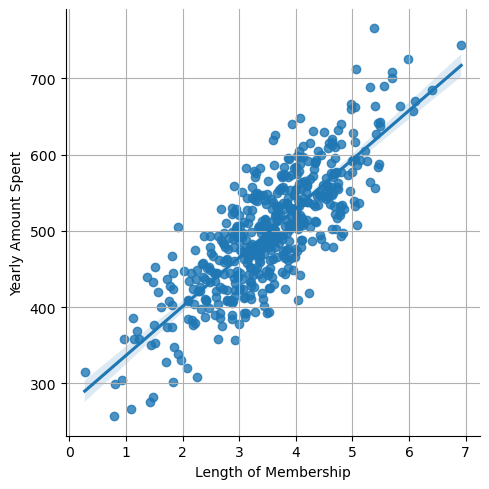

In [51]:
sns.lmplot(x ='Length of Membership', y='Yearly Amount Spent' ,data= data)
plt.grid(True)

## Training and Testing Data

In [70]:
X = data[['Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership']]
y = data['Yearly Amount Spent']

In [72]:
data.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [73]:
X_train , X_test, y_train , y_test = train_test_split(X, y, test_size =0.4)

In [74]:
lm = LinearRegression()

In [75]:
lm.fit(X_train, y_train)

LinearRegression()

In [76]:
lm.intercept_


-1031.7186350928769

In [78]:
lm.coef_

array([2.57127422e+01, 3.82920437e+01, 4.91796108e-02, 6.16036108e+01])

In [86]:
cdf = pd.DataFrame(lm.coef_ , X.columns , columns=['coeff'])
cdf

,coeff
Avg. Session Length,25.712742
Time on App,38.292044
Time on Website,0.049180
Length of Membership,61.603611


##  Predicting the test Data

In [88]:
prediction = lm.predict(X_test)
prediction

array([397.60170064, 603.73281988, 477.09041766, 446.83747474,
       548.47931265, 501.64359095, 511.62963941, 431.62783417,
       442.87566421, 469.41909878, 517.30317322, 573.4856873 ,
       444.12673285, 547.66909005, 487.49081266, 406.73146999,
       485.00415585, 551.74250655, 480.22339753, 507.855031  ,
       529.93194648, 507.86860898, 523.57861558, 365.94578234,
       481.5645499 , 384.41844309, 684.40926508, 569.17738102,
       411.86273882, 460.46287532, 491.019487  , 530.58810398,
       438.53987742, 398.48620356, 431.55202611, 480.82675691,
       465.87195859, 606.16691332, 513.58871617, 618.15953941,
       542.9111341 , 340.67783923, 519.02995372, 498.95395397,
       577.53994859, 409.35669268, 639.84961884, 473.3776238 ,
       390.14476153, 547.43258379, 520.63210651, 492.94968062,
       372.32168   , 425.33711175, 427.93952512, 425.24956162,
       435.36897146, 542.53966315, 481.65782542, 523.35306556,
       475.09838851, 515.16055018, 460.32131662, 518.24

In [90]:
y_test

348    392.810345
314    610.128033
336    478.600916
44     448.229829
85     536.771899
          ...    
68     408.620188
389    581.308933
384    474.532329
34     507.441832
160    468.913501
Name: Yearly Amount Spent, Length: 200, dtype: float64

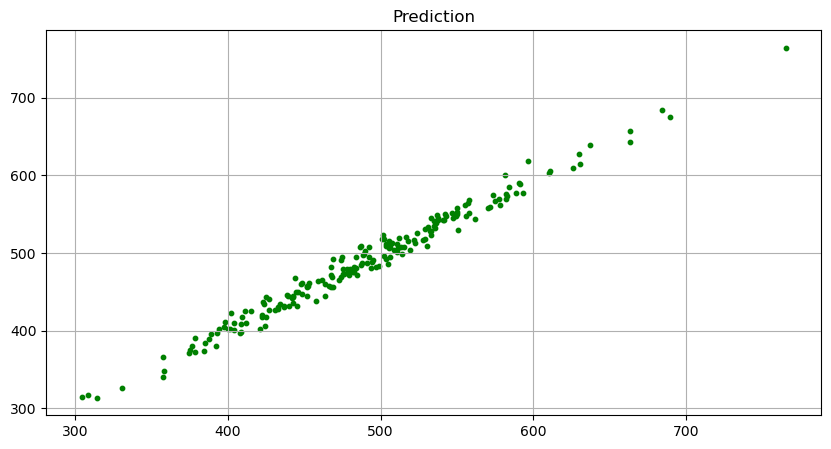

In [101]:
plt.figure(figsize = (10,5))
plt.title('Prediction')
plt.scatter(y_test, prediction , s = 10 , c = 'g')
plt.grid(True)


## Evaluating these values

In [104]:
metrics.mean_absolute_error(y_test, prediction)

8.018107427179148

In [105]:
metrics.mean_squared_error(y_test, prediction)

99.72974619694952

In [107]:
np.sqrt(metrics.mean_absolute_error(y_test, prediction))

2.8316262866379716

In [108]:
y_test


348    392.810345
314    610.128033
336    478.600916
44     448.229829
85     536.771899
          ...    
68     408.620188
389    581.308933
384    474.532329
34     507.441832
160    468.913501
Name: Yearly Amount Spent, Length: 200, dtype: float64

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Yearly Amount Spent', ylabel='Density'>

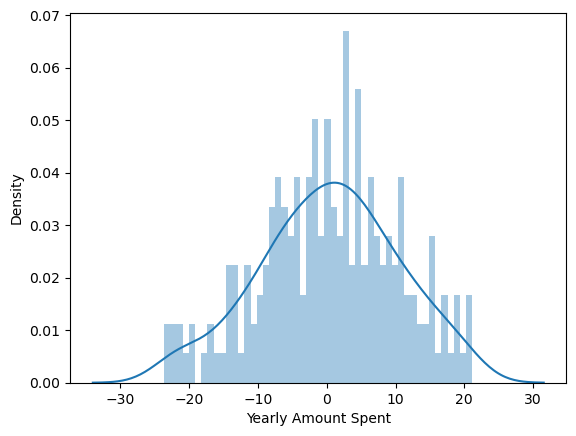

In [127]:
sns.distplot(y_test-prediction, bins =50)

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Yearly Amount Spent', ylabel='Density'>

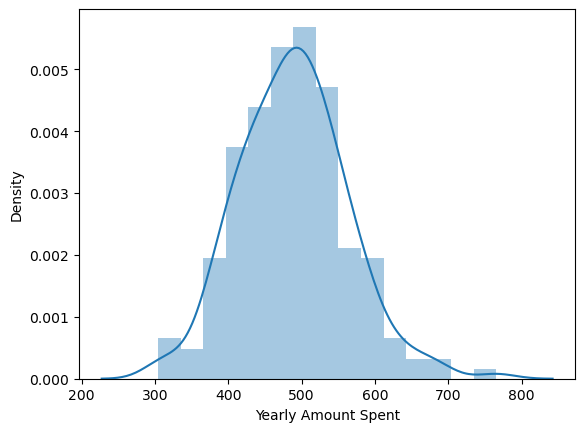

In [128]:
sns.distplot(y_test)

## # conclusion

In [131]:
coeff = pd.DataFrame(lm.coef_, X.columns, columns = ['Coefficients'])

In [133]:
coeff

,Coefficients
Avg. Session Length,25.712742
Time on App,38.292044
Time on Website,0.049180
Length of Membership,61.603611


## Thats it 
* code by Sudeep Bogati
- github : http://github.com/sudeepbogati7